In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaning/data_cleaned.csv')

# Overview

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1418 non-null   str    
 1   developer        1415 non-null   str    
 2   publisher        1408 non-null   str    
 3   release_date     1390 non-null   str    
 4   tags             1405 non-null   str    
 5   categories       1416 non-null   str    
 6   rating_percent   1299 non-null   float64
 7   reviews_count    1299 non-null   float64
 8   price            1390 non-null   float64
 9   current_players  1418 non-null   int64  
 10  24h_peak         1418 non-null   int64  
 11  all_time_peak    1418 non-null   int64  
dtypes: float64(3), int64(3), str(6)
memory usage: 133.1 KB


In [4]:
df.describe()

,rating_percent,reviews_count,price,current_players,24h_peak,all_time_peak
count,1299.000000,1.299000e+03,1390.000000,1418.000000,1.418000e+03,1.418000e+03
mean,79.636259,9.372587e+04,8.677072,4120.087447,7.239309e+03,6.303379e+04
std,13.796837,3.222672e+05,11.308376,24502.125745,4.880557e+04,1.714743e+05
min,17.350000,5.160000e+02,0.000000,0.000000,0.000000e+00,1.149000e+03
25%,72.390000,1.265350e+04,0.490000,47.250000,1.132500e+02,1.303175e+04
50%,83.390000,3.028000e+04,4.490000,482.500000,8.840000e+02,2.125600e+04
75%,89.910000,8.047000e+04,11.990000,1942.750000,3.294750e+03,5.260600e+04
max,97.740000,9.357964e+06,69.990000,664902.000000,1.427869e+06,3.257248e+06


# Игроки

In [5]:
df.loc[df.current_players.idxmax(), ['name', 'current_players']]

name               Counter-Strike 2
current_players              664902
Name: 0, dtype: object

In [6]:
df.loc[df['24h_peak'].idxmax(), ['name', '24h_peak']]

name        Counter-Strike 2
24h_peak             1427869
Name: 0, dtype: object

In [7]:
df.loc[df.all_time_peak.idxmax(), ['name', 'all_time_peak']]

name             PUBG: BATTLEGROUNDS
all_time_peak                3257248
Name: 6, dtype: object

# Цена

In [8]:
df.loc[df.price.idxmax(), ['name', 'price', 'release_date']]

name            CODE VEIN II
price                  69.99
release_date      29.01.2026
Name: 163, dtype: object

# Рейтинг

In [9]:
df.loc[df.rating_percent.idxmax()]

name                                                        Portal 2
developer                                                      Valve
publisher                                                      Valve
release_date                                              19.04.2011
tags               Platformer | Puzzle | First-Person | Dark Humo...
categories         Single-player | Online Co-op | Shared/Split Sc...
rating_percent                                                 97.74
reviews_count                                               453124.0
price                                                           0.99
current_players                                                 1457
24h_peak                                                        2309
all_time_peak                                                  98460
Name: 426, dtype: object

In [10]:
df.loc[df.reviews_count.idxmax()]

name                                                Counter-Strike 2
developer                                                      Valve
publisher                                                      Valve
release_date                                              21.08.2012
tags               FPS | Shooter | Multiplayer | Competitive | Ac...
categories         Cross-Platform Multiplayer | Steam Trading Car...
rating_percent                                                 86.04
reviews_count                                              9357964.0
price                                                           5.39
current_players                                               664902
24h_peak                                                     1427869
all_time_peak                                                1862531
Name: 0, dtype: object

# Топ разработчиков по среднему рейтингу игр

In [11]:
df_exploded = (df.dropna(subset=['developer']).assign(developer=df.developer.str.split(r'\s*\|\s*')).explode('developer'))

In [12]:
df_exploded.dropna(subset=['developer', 'rating_percent']).groupby('developer', as_index=False).agg(
    avg_rating=('rating_percent', 'mean'),
    games_count=('name', 'count')

).sort_values('avg_rating', ascending=False).head(10)

,developer,avg_rating,games_count
160,ConcernedApe,97.70,1
949,mestiez,97.40,1
953,poncle,97.24,1
424,KayAnimate,97.01,1
791,TVGS,96.85,1
639,Re-Logic,96.76,1
461,Ludeon Studios,96.73,1
458,LocalThunk,96.69,1
18,AIHASTO,96.54,1
487,Mega Crit,96.49,1


In [13]:
df_exploded.dropna(subset=['developer', 'rating_percent']).groupby('developer', as_index=False).agg(
    avg_rating=('rating_percent', 'mean'),
    games_count=('name', 'count')
    
).query('games_count >= 3').sort_values('avg_rating', ascending=False).head(10)

,developer,avg_rating,games_count
348,Hazelight Studios,92.270000,3
443,Larian Studios,91.897500,4
328,Giants Software,91.410000,3
153,Coffee Stain Studios,91.103333,3
808,Telltale Games,90.677500,4
626,ProjectMoon,90.236667,3
12,4A Games,90.123333,3
431,Klei Entertainment,89.707500,4
285,Forgotten Empires,89.453333,6
678,Ryu Ga Gotoku Studio,89.403333,3


# Топ разработчиков по количеству отзывов на игры

In [14]:
df_exploded.groupby('developer', as_index=False).agg(
    total_reviews=('reviews_count', 'sum'),
    games_count=('name', 'nunique')

).sort_values('total_reviews', ascending=False).head(10)

,developer,total_reviews,games_count
958,Valve,16146761.0,19
631,PUBG Corporation,2668682.0,1
285,Facepunch Studios,2534438.0,2
325,"FromSoftware, Inc.",2531212.0,9
730,Rockstar North,2382603.0,3
934,Ubisoft Montreal,2350703.0,12
131,"CAPCOM Co., Ltd.",2091570.0,16
133,CD PROJEKT RED,1966727.0,4
100,Bethesda Game Studios,1597047.0,8
298,Feral Interactive (Mac),1519021.0,20


In [15]:
devs_stats = df_exploded.groupby('developer', as_index=False).agg(
    total_reviews=('reviews_count', 'sum'),
    avg_rating=('rating_percent', 'mean'),
    games_count=('name', 'nunique')
)

devs_stats['score'] = (devs_stats.total_reviews * devs_stats.avg_rating)
log_score = np.log1p(devs_stats['score'])
devs_stats['score_1_10'] = (1 + 9 * (log_score - log_score.min()) / (log_score.max() - log_score.min())).round(2)

devs_stats.sort_values('score_1_10', ascending=False).head(10)

,developer,total_reviews,avg_rating,games_count,score,score_1_10
958,Valve,16146761.0,88.459444,19,1.428334e+09,10.00
285,Facepunch Studios,2534438.0,91.340000,2,2.314956e+08,8.52
325,"FromSoftware, Inc.",2531212.0,89.175556,9,2.257222e+08,8.50
730,Rockstar North,2382603.0,82.860000,3,1.974225e+08,8.39
934,Ubisoft Montreal,2350703.0,77.531818,12,1.822543e+08,8.33
133,CD PROJEKT RED,1966727.0,89.110000,4,1.752550e+08,8.30
131,"CAPCOM Co., Ltd.",2091570.0,78.811875,16,1.648406e+08,8.25
631,PUBG Corporation,2668682.0,59.920000,1,1.599074e+08,8.22
695,Re-Logic,1486528.0,96.760000,1,1.438364e+08,8.14
100,Bethesda Game Studios,1597047.0,79.645000,8,1.271968e+08,8.04


# Топ разработчиков по количеству выпущенных игр

In [16]:
df_exploded.groupby('developer', as_index=False).agg(
    games_count=('name', 'nunique')

).sort_values('games_count', ascending=False).head(10)

,developer,games_count
298,Feral Interactive (Mac),20
958,Valve,19
814,Square Enix,19
296,Feral Interactive (Linux),18
810,Sports Interactive,16
131,"CAPCOM Co., Ltd.",16
453,"KOEI TECMO GAMES CO., LTD.",13
934,Ubisoft Montreal,12
353,Gearbox Software,11
970,Visual Concepts,11


# Топ любимых жанров игроков

In [17]:
df_tags = df.dropna(subset=['tags']).copy()
df_tags['tags'] = df_tags.tags.str.split(r'\s*\|\s*')

df_tags = df_tags.explode('tags')
df_tags['tags'] = df_tags.tags.str.strip()

tags_stats = (df_tags.groupby('tags', as_index=False).agg(
    avg_rating=('rating_percent', 'mean'),
    total_reviews=('reviews_count', 'sum'),
    total_current_players=('current_players', 'sum'),
    total_24h_peak=('24h_peak', 'sum'),
    total_all_time_peak=('all_time_peak', 'sum'),
    games_count=('name', 'nunique')))

tags_stats['score'] = tags_stats['total_reviews'] * tags_stats['avg_rating']
log_score = np.log1p(tags_stats['score'])
tags_stats['score_1_10'] = (1 + 9 * (log_score - log_score.min()) / (log_score.max() - log_score.min())).round(2)

# По рейтингу

In [18]:
tags_stats.sort_values('score_1_10', ascending=False).head(10)

,tags,avg_rating,total_reviews,total_current_players,total_24h_peak,total_all_time_peak,games_count,score,score_1_10
17,Action,79.076354,103005475.0,4587626,8209818,69542728,914,8.145297e+09,10.00
231,Multiplayer,77.704159,94123920.0,4837707,8736586,63249287,862,7.313820e+09,9.91
320,Singleplayer,81.013656,78990658.0,2929495,4797354,59947452,1013,6.399322e+09,9.80
77,Co-op,77.685619,72204819.0,3708675,6760805,44847123,542,5.609276e+09,9.70
23,Adventure,80.995374,60218442.0,1833918,3119535,46165285,699,4.877415e+09,9.58
146,First-Person,80.112129,58377467.0,2272848,4566132,28302604,372,4.676743e+09,9.55
252,Online Co-Op,77.085184,58194967.0,3479829,6285197,38936696,416,4.485970e+09,9.51
37,Atmospheric,82.669397,49330900.0,1721893,2735607,33390023,470,4.078156e+09,9.44
253,Open World,79.496680,50592784.0,2025820,3334525,34953293,492,4.021958e+09,9.42
314,Shooter,77.146302,49791625.0,2474472,4655037,25306890,322,3.841240e+09,9.39


# По количеству игроков сейчас

In [19]:
tags_stats.sort_values('total_current_players', ascending=False).head(10)

,tags,avg_rating,total_reviews,total_current_players,total_24h_peak,total_all_time_peak,games_count,score,score_1_10
231,Multiplayer,77.704159,94123920.0,4837707,8736586,63249287,862,7.313820e+09,9.91
17,Action,79.076354,103005475.0,4587626,8209818,69542728,914,8.145297e+09,10.00
77,Co-op,77.685619,72204819.0,3708675,6760805,44847123,542,5.609276e+09,9.70
252,Online Co-Op,77.085184,58194967.0,3479829,6285197,38936696,416,4.485970e+09,9.51
320,Singleplayer,81.013656,78990658.0,2929495,4797354,59947452,1013,6.399322e+09,9.80
281,PvP,72.227305,42959902.0,2901146,5581677,30888037,317,3.102878e+09,9.21
341,Strategy,80.245844,39763201.0,2580240,4844007,26608338,426,3.190832e+09,9.23
314,Shooter,77.146302,49791625.0,2474472,4655037,25306890,322,3.841240e+09,9.39
146,First-Person,80.112129,58377467.0,2272848,4566132,28302604,372,4.676743e+09,9.55
319,Simulation,81.219899,34558499.0,2078341,3919783,23600553,417,2.806838e+09,9.13


# По суточному максимуму игроков

In [20]:
tags_stats.sort_values('total_24h_peak', ascending=False).head(10)

,tags,avg_rating,total_reviews,total_current_players,total_24h_peak,total_all_time_peak,games_count,score,score_1_10
231,Multiplayer,77.704159,94123920.0,4837707,8736586,63249287,862,7.313820e+09,9.91
17,Action,79.076354,103005475.0,4587626,8209818,69542728,914,8.145297e+09,10.00
77,Co-op,77.685619,72204819.0,3708675,6760805,44847123,542,5.609276e+09,9.70
252,Online Co-Op,77.085184,58194967.0,3479829,6285197,38936696,416,4.485970e+09,9.51
281,PvP,72.227305,42959902.0,2901146,5581677,30888037,317,3.102878e+09,9.21
341,Strategy,80.245844,39763201.0,2580240,4844007,26608338,426,3.190832e+09,9.23
320,Singleplayer,81.013656,78990658.0,2929495,4797354,59947452,1013,6.399322e+09,9.80
314,Shooter,77.146302,49791625.0,2474472,4655037,25306890,322,3.841240e+09,9.39
146,First-Person,80.112129,58377467.0,2272848,4566132,28302604,372,4.676743e+09,9.55
355,Team-Based,73.726692,29577811.0,2069605,4082160,14709751,133,2.180674e+09,8.92


# По максимуму игроков за все время

In [21]:
tags_stats.sort_values('total_all_time_peak', ascending=False).head(10)

,tags,avg_rating,total_reviews,total_current_players,total_24h_peak,total_all_time_peak,games_count,score,score_1_10
17,Action,79.076354,103005475.0,4587626,8209818,69542728,914,8.145297e+09,10.00
231,Multiplayer,77.704159,94123920.0,4837707,8736586,63249287,862,7.313820e+09,9.91
320,Singleplayer,81.013656,78990658.0,2929495,4797354,59947452,1013,6.399322e+09,9.80
23,Adventure,80.995374,60218442.0,1833918,3119535,46165285,699,4.877415e+09,9.58
77,Co-op,77.685619,72204819.0,3708675,6760805,44847123,542,5.609276e+09,9.70
252,Online Co-Op,77.085184,58194967.0,3479829,6285197,38936696,416,4.485970e+09,9.51
283,RPG,78.517026,38195954.0,1967308,3115743,36853745,529,2.999033e+09,9.18
253,Open World,79.496680,50592784.0,2025820,3334525,34953293,492,4.021958e+09,9.42
37,Atmospheric,82.669397,49330900.0,1721893,2735607,33390023,470,4.078156e+09,9.44
357,Third Person,78.939233,36993892.0,1725764,3076572,31001052,363,2.920269e+09,9.16


# Визуализация

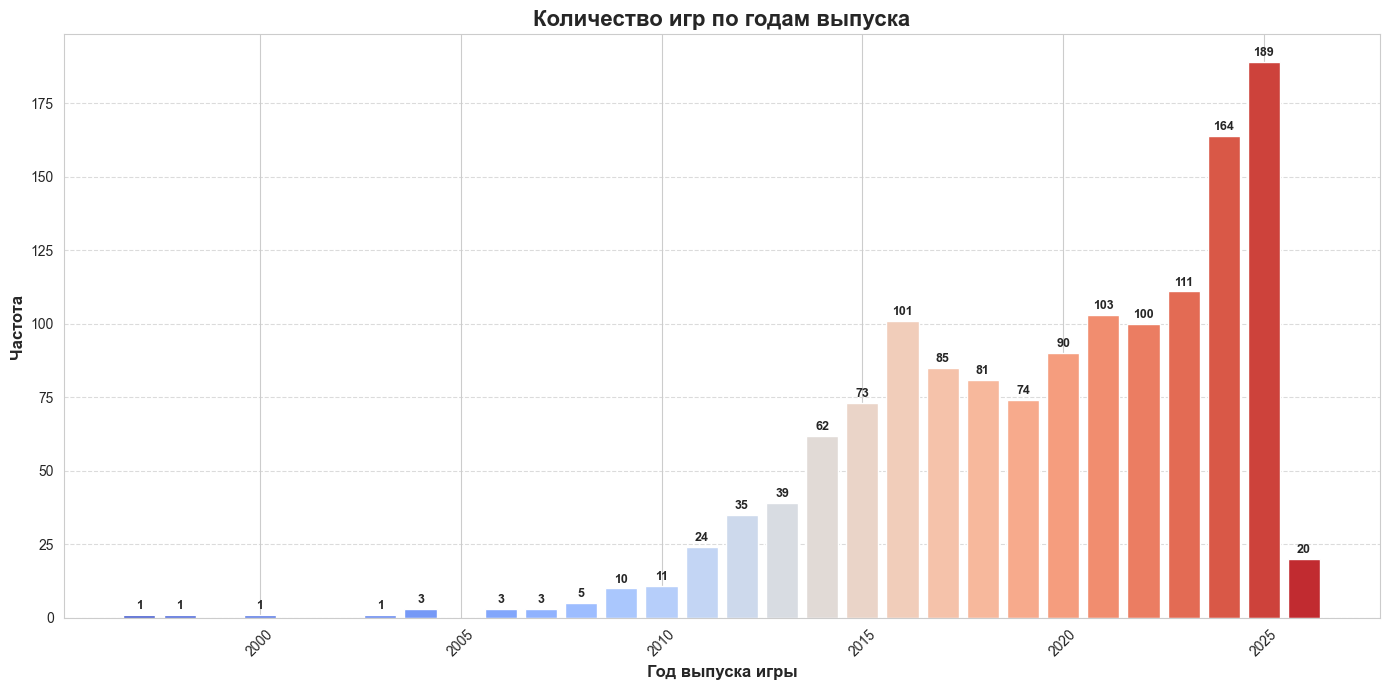

In [22]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%d.%m.%Y', errors='coerce')
df['release_year'] = df['release_date'].dt.year

games_per_year = df['release_year'].value_counts().sort_index()

sns.set_style('whitegrid')
plt.figure(figsize=(14,7))

bars = plt.bar(games_per_year.index, games_per_year.values, color=sns.color_palette('coolwarm', len(games_per_year)))

plt.xlabel('Год выпуска игры', fontsize=12, weight='bold')
plt.ylabel('Частота', fontsize=12, weight='bold')
plt.title('Количество игр по годам выпуска', fontsize=16, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=9, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

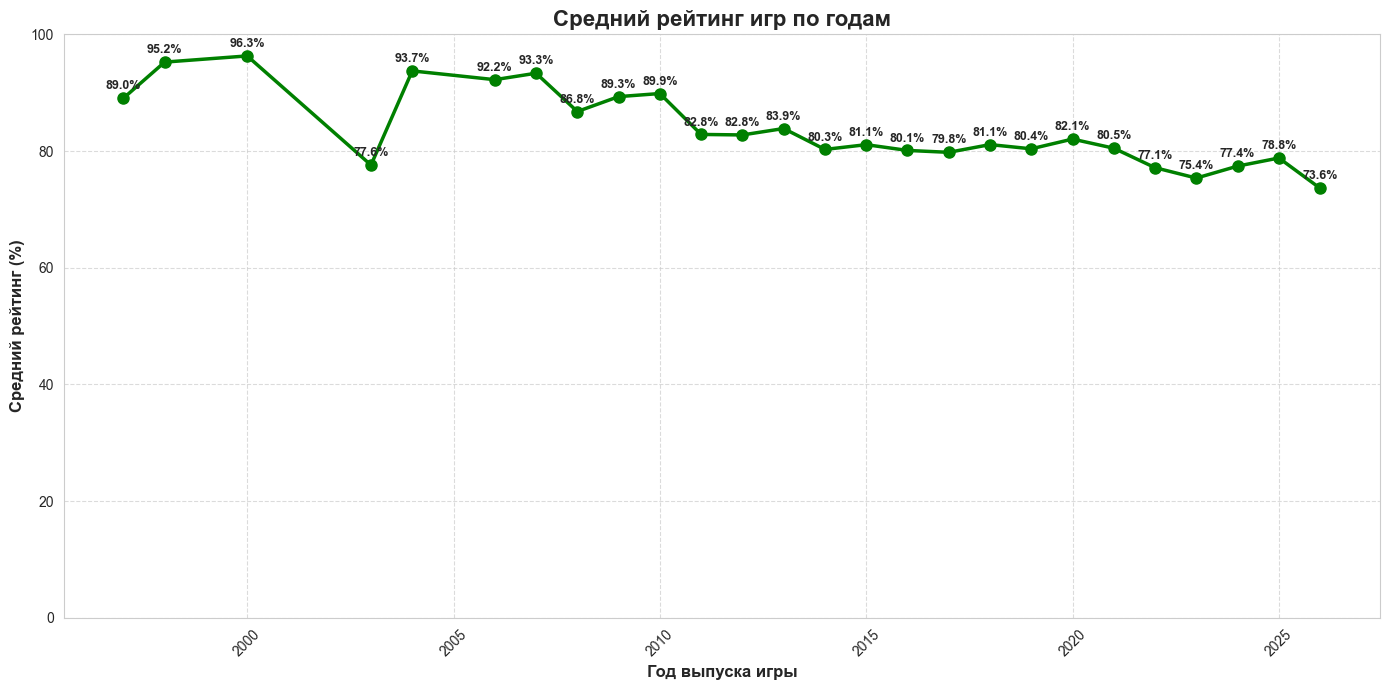

In [23]:
df_rating = df.dropna(subset=['rating_percent', 'release_year'])
avg_rating_per_year = df_rating.groupby('release_year')['rating_percent'].mean()

sns.set_style('whitegrid')
plt.figure(figsize=(14,7))

plt.plot(avg_rating_per_year.index, avg_rating_per_year.values, 
         marker='o', markersize=8, linestyle='-', linewidth=2.5, color='green')

plt.xlabel('Год выпуска игры', fontsize=12, weight='bold')
plt.ylabel('Средний рейтинг (%)', fontsize=12, weight='bold')
plt.title('Средний рейтинг игр по годам', fontsize=16, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)

for x, y in zip(avg_rating_per_year.index, avg_rating_per_year.values):
    plt.text(x, y + 1, f'{y:.1f}%', ha='center', va='bottom', fontsize=9, weight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

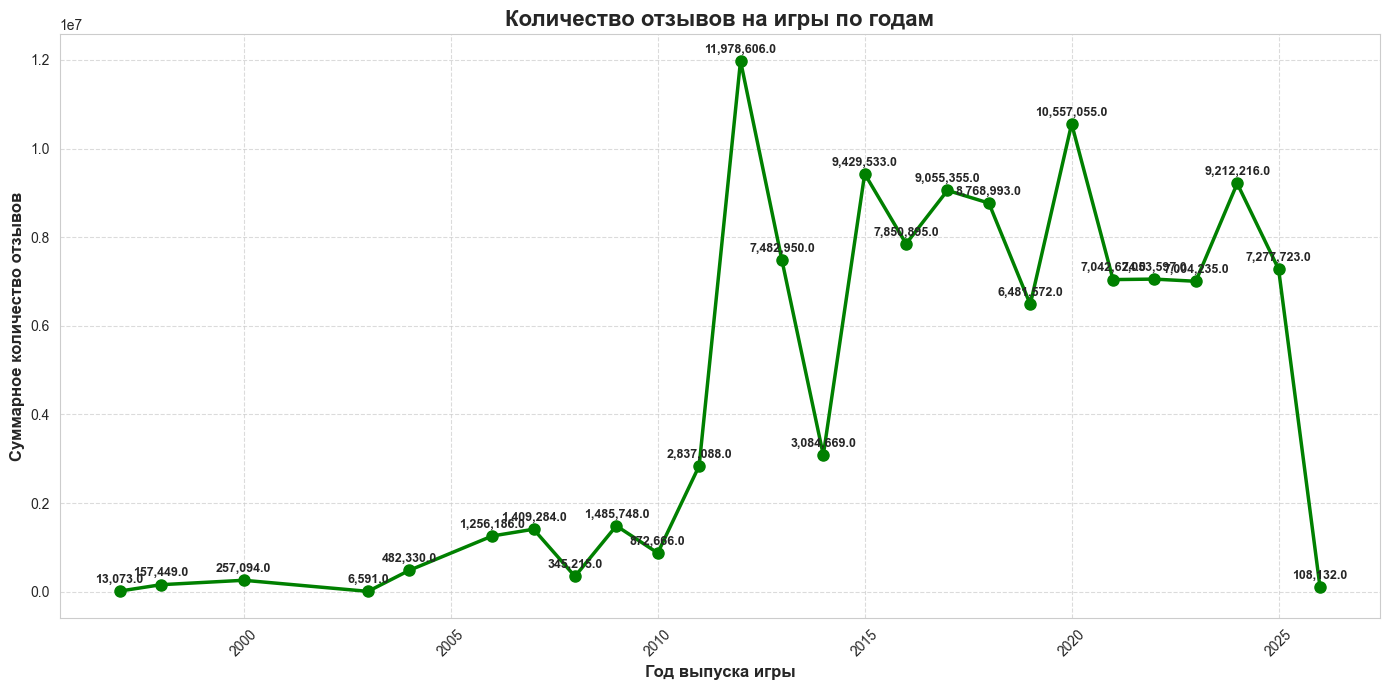

In [24]:
df_reviews = df.dropna(subset=['reviews_count', 'release_year'])
reviews_per_year = df_reviews.groupby('release_year')['reviews_count'].sum()

sns.set_style('whitegrid')
plt.figure(figsize=(14,7))

plt.plot(reviews_per_year.index, reviews_per_year.values, 
         marker='o', markersize=8, linestyle='-', linewidth=2.5, color='green')

plt.xlabel('Год выпуска игры', fontsize=12, weight='bold')
plt.ylabel('Суммарное количество отзывов', fontsize=12, weight='bold')
plt.title('Количество отзывов на игры по годам', fontsize=16, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for x, y in zip(reviews_per_year.index, reviews_per_year.values):
    plt.text(x, y + max(reviews_per_year.values)*0.01, f'{y:,}', 
             ha='center', va='bottom', fontsize=9, weight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

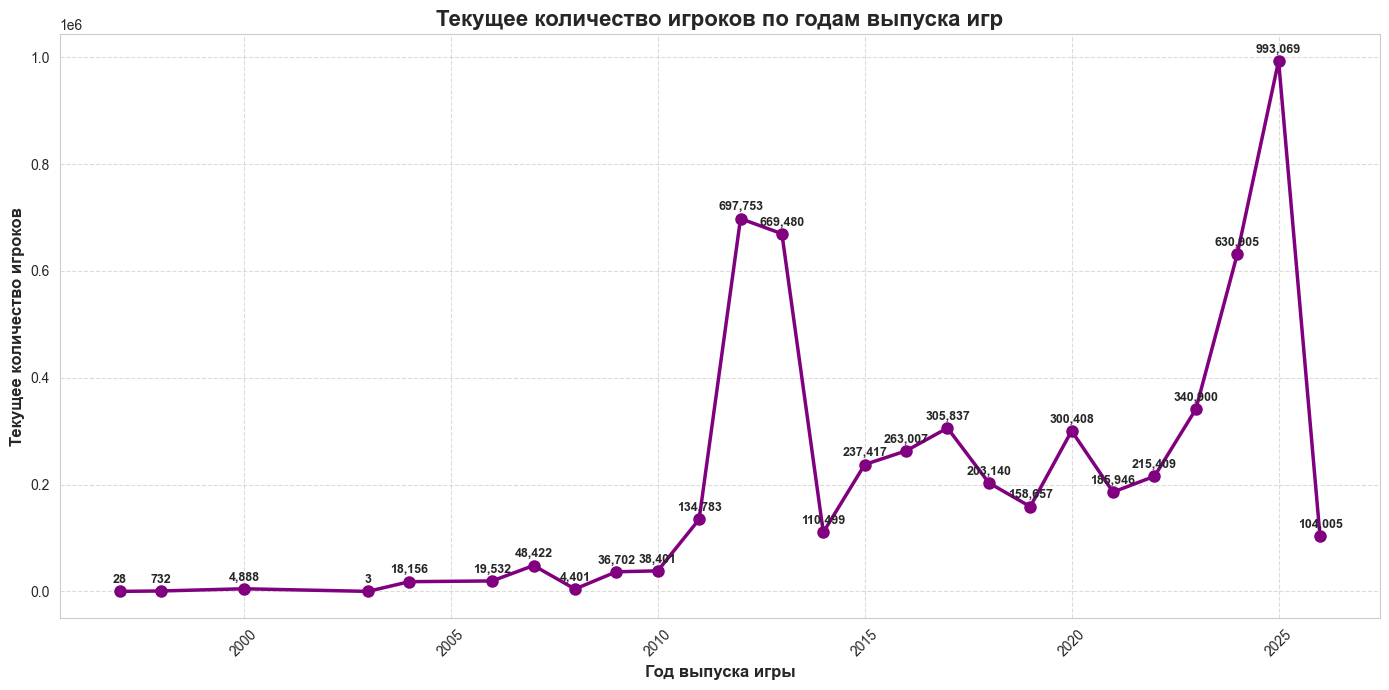

In [25]:
df_players = df.dropna(subset=['current_players', 'release_year'])
players_per_year = df_players.groupby('release_year')['current_players'].sum()

sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

plt.plot(players_per_year.index, players_per_year.values, 
         marker='o', markersize=8, linestyle='-', linewidth=2.5, color='purple')

plt.xlabel('Год выпуска игры', fontsize=12, weight='bold')
plt.ylabel('Текущее количество игроков', fontsize=12, weight='bold')
plt.title('Текущее количество игроков по годам выпуска игр', fontsize=16, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for x, y in zip(players_per_year.index, players_per_year.values):
    plt.text(x, y + max(players_per_year.values)*0.01, f'{y:,}', 
             ha='center', va='bottom', fontsize=9, weight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

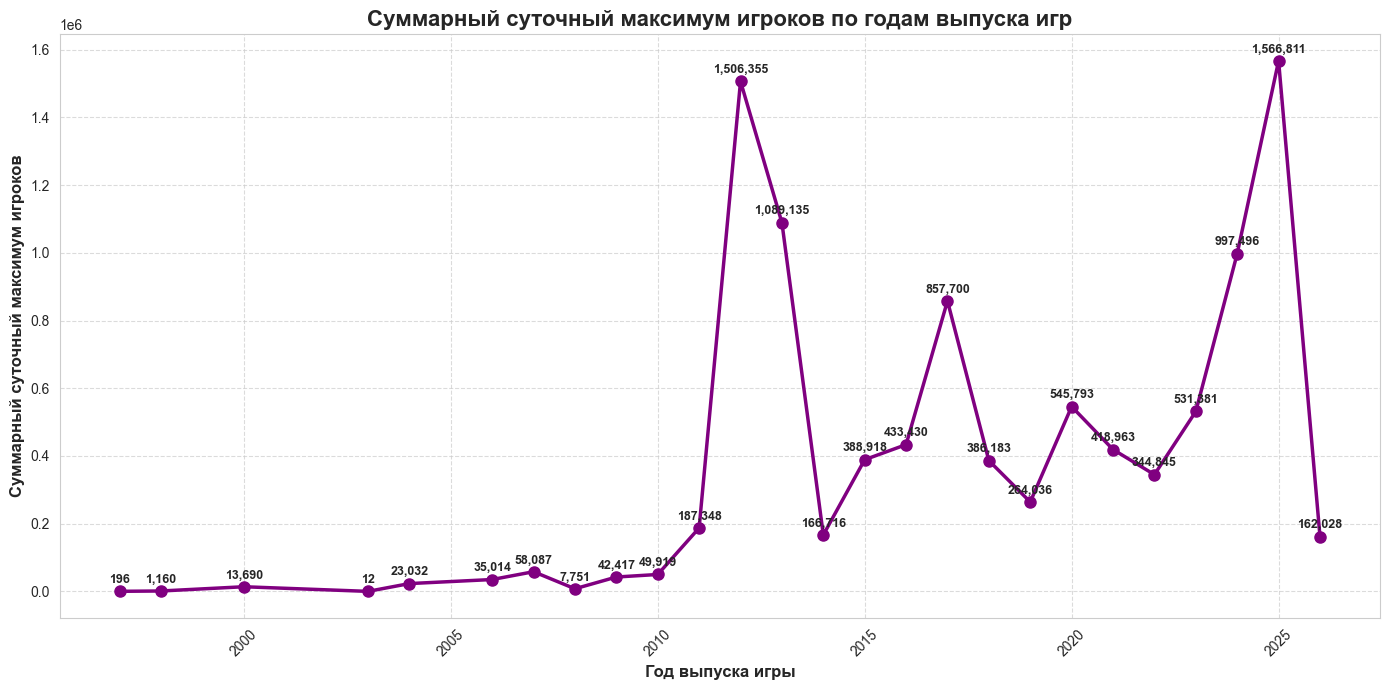

In [26]:
df_peak = df.dropna(subset=['24h_peak', 'release_year'])
peak_per_year = df_peak.groupby('release_year')['24h_peak'].sum()

sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

plt.plot(peak_per_year.index, peak_per_year.values, 
         marker='o', markersize=8, linestyle='-', linewidth=2.5, color='purple')

plt.xlabel('Год выпуска игры', fontsize=12, weight='bold')
plt.ylabel('Суммарный суточный максимум игроков', fontsize=12, weight='bold')
plt.title('Суммарный суточный максимум игроков по годам выпуска игр', fontsize=16, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for x, y in zip(peak_per_year.index, peak_per_year.values):
    plt.text(x, y + max(peak_per_year.values)*0.01, f'{y:,}', 
             ha='center', va='bottom', fontsize=9, weight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

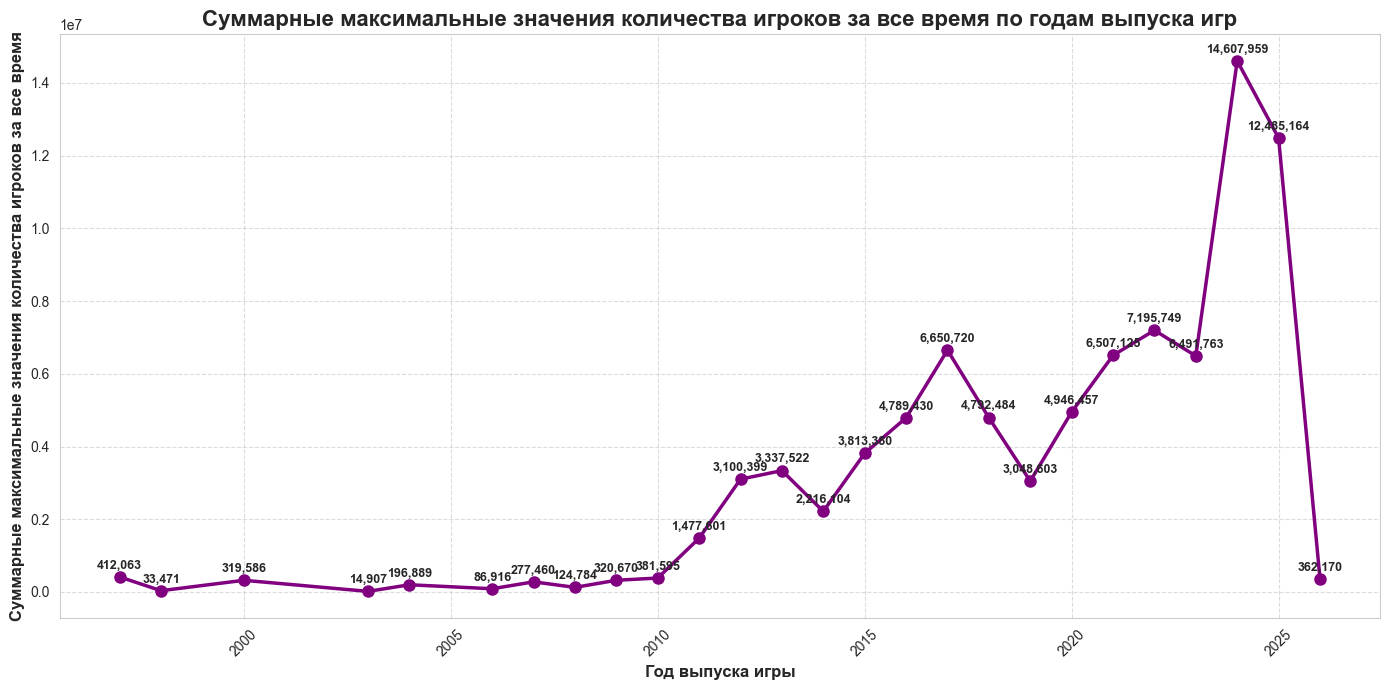

In [27]:
df_alltime = df.dropna(subset=['all_time_peak', 'release_year'])
alltime_peak_per_year = df_alltime.groupby('release_year')['all_time_peak'].sum()

sns.set_style("whitegrid")
plt.figure(figsize=(14,7))

plt.plot(alltime_peak_per_year.index, alltime_peak_per_year.values, 
         marker='o', markersize=8, linestyle='-', linewidth=2.5, color='purple')

plt.xlabel('Год выпуска игры', fontsize=12, weight='bold')
plt.ylabel('Суммарные максимальные значения количества игроков за все время', fontsize=12, weight='bold')
plt.title('Суммарные максимальные значения количества игроков за все время по годам выпуска игр', fontsize=16, weight='bold')

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

for x, y in zip(alltime_peak_per_year.index, alltime_peak_per_year.values):
    plt.text(x, y + max(alltime_peak_per_year.values)*0.01, f'{y:,}', 
             ha='center', va='bottom', fontsize=9, weight='bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Гипотеза
### Чем больше людей играет в игру, тем больше отзывов и тем ниже средний рейтинг, т.к. с ростом аудитории обязательно будет больше недовольных.

In [28]:
df_analysis = df.dropna(subset=['rating_percent', 'current_players', 'reviews_count']).copy()
df_analysis = df_analysis[['name', 'rating_percent', 'reviews_count', 'current_players', '24h_peak']]

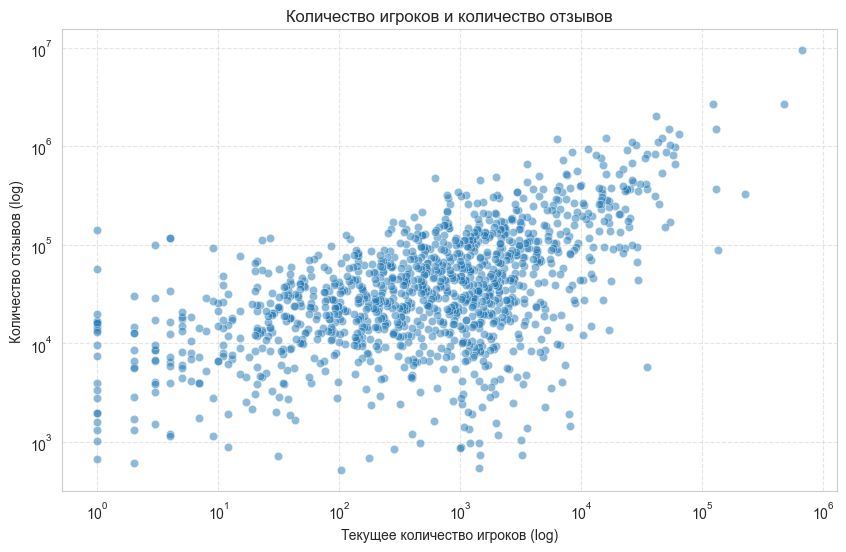

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_analysis, x='current_players', y='reviews_count', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Текущее количество игроков (log)')
plt.ylabel('Количество отзывов (log)')
plt.title('Количество игроков и количество отзывов')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

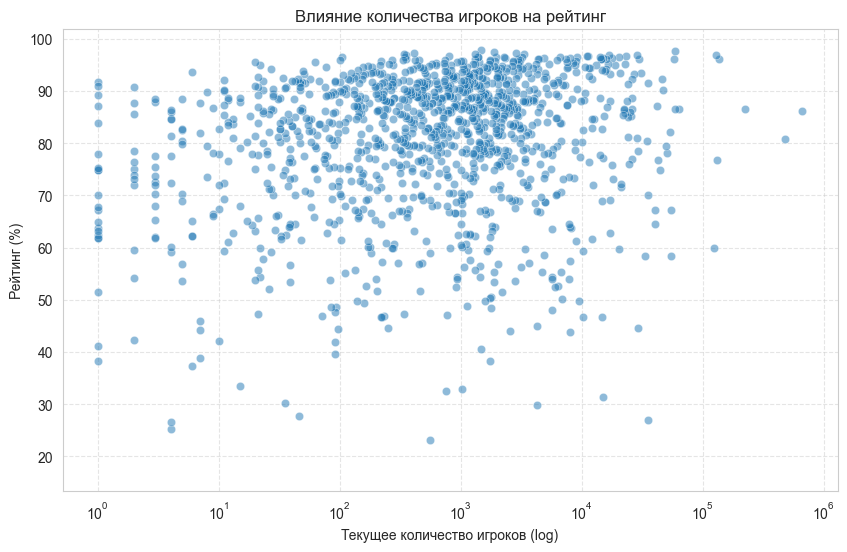

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_analysis, x='current_players', y='rating_percent', alpha=0.5)
plt.xscale('log')
plt.xlabel('Текущее количество игроков (log)')
plt.ylabel('Рейтинг (%)')
plt.title('Влияние количества игроков на рейтинг')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

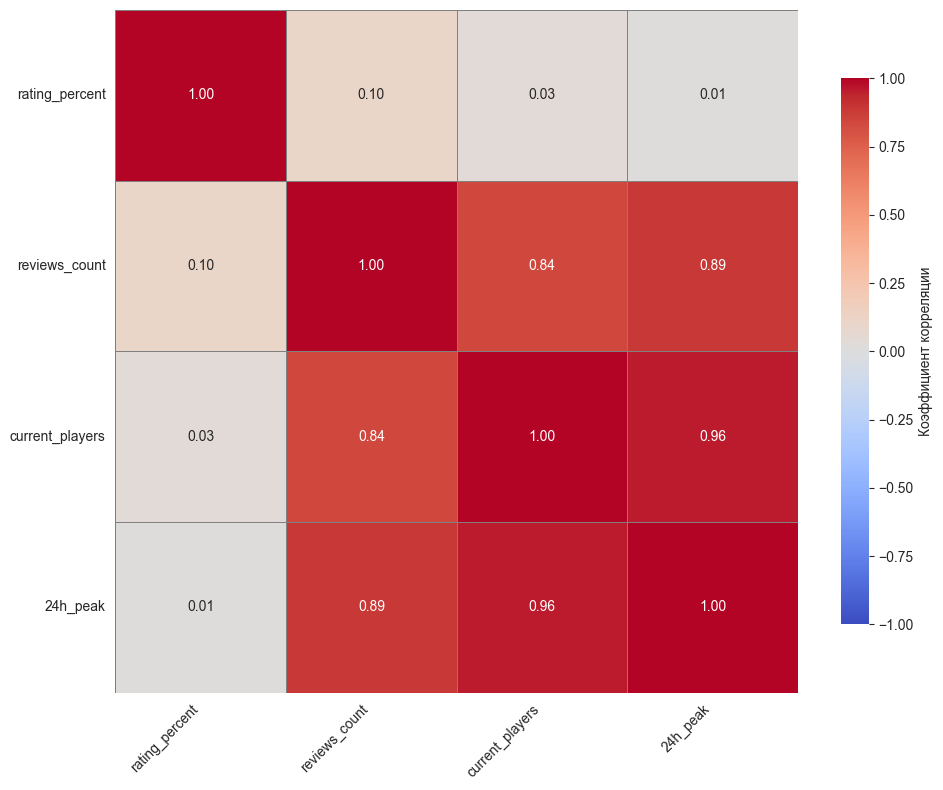

In [31]:
corr_matrix = df_analysis[['rating_percent', 'reviews_count', 'current_players', '24h_peak']].corr()

plt.figure(figsize=(10,8))
sns.set_style("white")

sns.heatmap(corr_matrix, 
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1, vmax=1,
            linewidths=0.5,
            linecolor='gray', 
            square=True,
            cbar_kws={"shrink": 0.8, "label": "Коэффициент корреляции"})

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()